In [2]:
import os
import tensorflow as tf
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
import segmentation_models as sm
from keras import backend as K

Segmentation Models: using `keras` framework.


In [4]:
def jaccard_coeff(ytrue, ypred):
    ytrue_flatten=K.flatten(ytrue)
    ypred_flatten=K.flatten(ypred)
    intersection = K.sum(ytrue_flatten * ypred_flatten)
    final_coef_value=(intersection+1.0)/(K.sum(ytrue_flatten)+K.sum(ypred_flatten)-intersection+1.0)
    return final_coef_value

In [5]:
weights = [0.1666,0.1666,0.1666,0.1666,0.1666,0.1666]
dice_loss=sm.losses.DiceLoss(class_weights=weights)
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss+(1*focal_loss)

In [6]:
from keras.models import load_model

In [7]:
saved_model=load_model('satellite_segmentation_full.h5',custom_objects=({'dice_loss_plus_1focal_loss':total_loss,'jaccard_coeff':jaccard_coeff}))

In [17]:
image=Image.open('dataset/customImages/10.jpg')
if image.mode == 'RGBA':
    image = image.convert('RGB')
image=image.resize((256,256))
# plt.imshow(image)
image=np.array(image)
image=np.expand_dims(image,0)

In [18]:
prediction=saved_model.predict(image)

1/1 [==============================] - 0s 18ms/step


In [19]:
predicted_image=np.argmax(prediction,axis=3)
predicted_image=predicted_image[0,:,:]

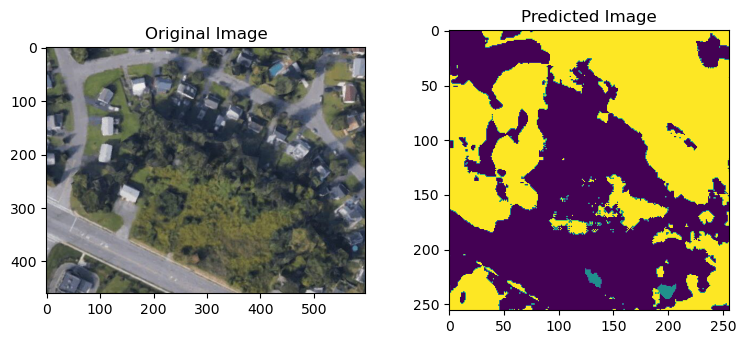

In [20]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(Image.open('dataset/customImages/10.jpg'))
plt.subplot(232)
plt.title('Predicted Image')
plt.imshow(predicted_image)

In [92]:
import gradio as gr
from PIL import Image

In [93]:
# my_app=gr.Blocks()

In [122]:
def process_input_image(image_source):
    # image=image_source
    # if image_source.mode == 'RGBA':
        # image_source = image_source.convert('RGB')
    # image=image.resize((256,256))
    # plt.imshow(image)
    # image=np.array(image)
    if image_source.shape[2]==4:
        image_source=image_source[:,:,:3]
    image_tensor = tf.convert_to_tensor(image_source, dtype=tf.float32)
    image_resized = tf.image.resize(image_tensor, [256, 256])
    image=np.expand_dims(image_source,0)
    image_resized = tf.expand_dims(image_resized, axis=0)
    
    prediction=saved_model.predict(image_resized)
    predicted_image=np.argmax(prediction,axis=3)
    predicted_image=predicted_image[0,:,:]
    print(predicted_image)
    predicted_image=predicted_image*50
    return 'Predicted Mask Image',predicted_image

In [123]:
# def load_image(image):
#     pil_image = Image.fromarray(image)
#     if pil_image.mode == 'RGBA':
#         pil_image = pil_image.convert('RGB')
#     return np.array(pil_image)

In [124]:
my_app=gr.Blocks()
with my_app:
    gr.Markdown('Image processing application UI with Gradio')
    with gr.Tabs():
        with gr.TabItem('select your image'):
            with gr.Row():
                with gr.Column():
                    img_source=gr.Image(label='please select soruce Image') #height=256,width=256
                    source_image_loader=gr.Button('Load above Image')
                with gr.Column():
                    output_label=gr.Label(label='Image Info')
                    img_output=gr.Image(label='Image Output')
        source_image_loader.click(
            process_input_image,
            [
                img_source
            ],
            [
                output_label,
                img_output
            ]
         )        

In [125]:
my_app.close()
my_app.launch()

Running on local URL:  http://127.0.0.1:7876

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 26ms/step
[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]
1/1 [==============================] - 0s 21ms/step
[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 1]
 [3 3 3 ... 3 3 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
1/1 [==============================] - 0s 21ms/step
[[3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]
